In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the cleaned dataset
data = pd.read_csv('ca_training_subset.csv')

In [5]:
# Select representative item
item_id = 'FOODS_1_001_CA_1'
item_data = data[data['id'] == item_id].copy()

# Convert date to datetime and sort
item_data['date'] = pd.to_datetime(item_data['date'])
item_data = item_data.sort_values('date').reset_index(drop=True)

# Aggregate by 3-month periods (quarterly)
item_data['year'] = item_data['date'].dt.year
item_data['quarter'] = item_data['date'].dt.quarter
quarterly_data = (
    item_data.groupby(['year', 'quarter'])
    .agg({'sales': 'sum', 'date': 'min'})
    .reset_index()
)
quarterly_data['period'] = quarterly_data['year'].astype(str) + 'Q' + quarterly_data['quarter'].astype(str)

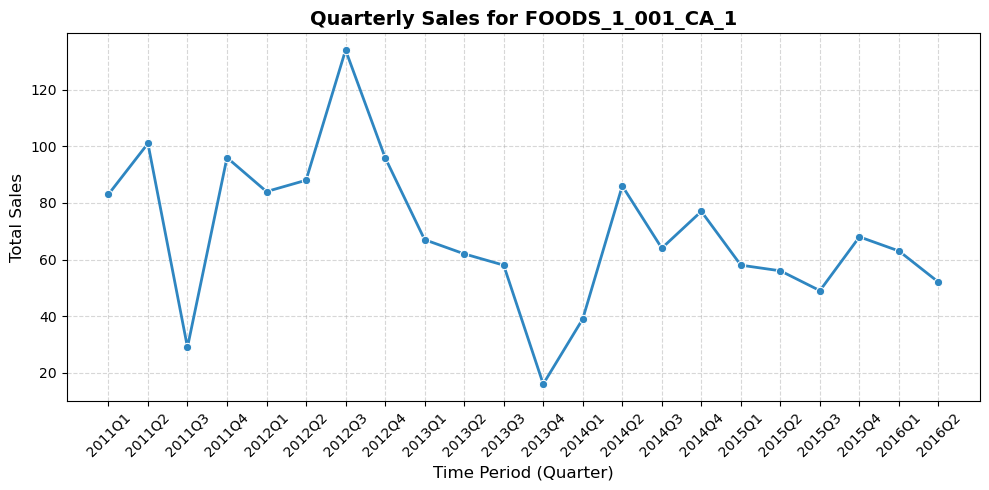

Total quarters: 22
Sales range: 16 to 134
Mean quarterly sales: 69.36


In [ ]:
# Create plot
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=quarterly_data,
    x='period',
    y='sales',
    marker='o',
    linewidth=2,
    markersize=6,
    color='#2E86C1'
)
plt.title(f'Quarterly Sales for {item_id}', fontsize=14, fontweight='bold')
plt.xlabel('Time Period (Quarter)', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Save figure
plt.savefig('./images/quarterly_sales.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print(f"Total quarters: {len(quarterly_data)}")
print(f"Sales range: {quarterly_data['sales'].min()} to {quarterly_data['sales'].max()}")
print(f"Mean quarterly sales: {quarterly_data['sales'].mean():.2f}")